# California 
California, estado occidental de EE.UU. Tercer estado con mas visita de turistas internacionales.

## Análisis Exploratorio de los Datos (EDA)

In [7]:
# Importamos galerias
import pandas as pd 
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [10]:
# Cambiar el directorio de trabajo al directorio donde se encuentran los archivos JSON
%cd .\california_data

# Obtener una lista de archivos en el directorio actual
archivos = os.listdir()

# Crear un DataFrame vacío para almacenar los datos
df = pd.DataFrame()

# Iterar sobre cada archivo en la lista de archivos
for archivo in archivos:
    # Verificar si el archivo tiene la extensión .json
    if archivo.endswith('.json'):
        # Imprimir un mensaje indicando que se está cargando el archivo actual
        print('Cargando data ', archivo, '...')
        # Leer el archivo JSON y cargarlo en un DataFrame
        data = pd.read_json(archivo, lines=True)
        # Concatenar los datos del archivo al DataFrame principal
        df = pd.concat([df, data], axis=0)

[WinError 2] El sistema no puede encontrar el archivo especificado: '.\\california_data'
c:\Users\sebas\OneDrive\Escritorio\Proyecto-Grupal-Google-yelp\Sprint 1 Propuesta de Trabajo\EDA Google\california_data
Cargando data  1.json ...
Cargando data  10.json ...
Cargando data  11.json ...
Cargando data  12.json ...
Cargando data  13.json ...
Cargando data  14.json ...
Cargando data  15.json ...
Cargando data  16.json ...
Cargando data  17.json ...
Cargando data  18.json ...
Cargando data  2.json ...
Cargando data  3.json ...
Cargando data  4.json ...
Cargando data  5.json ...
Cargando data  6.json ...
Cargando data  7.json ...
Cargando data  8.json ...
Cargando data  9.json ...


In [11]:
# Visualizamos el data frame 
df.head(6)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
5,1.001857e+20,Ana Salazar,1547799582640,5,This food is delicious 😁,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49


In [63]:
# Verificamos el tipo de dato en las columnas 
df.dtypes

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object

In [64]:
#Elimino la columna pics 
df=df.drop(['pics',],axis=1)

In [65]:
# Normalizacion de la columna time
# Normalizamos la columna time creando la columna time_normalizado con la fecha en el formato %d/%m/%y %H:%M:%S 
times = [] 
for data in df['time']/1000 :
    times.append(datetime.datetime.utcfromtimestamp(data).strftime('%d/%m/%y %H:%M:%S'))
df['time_normalizado']=times
 


C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\1771320214.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  times.append(datetime.datetime.utcfromtimestamp(data).strftime('%d/%m/%y %H:%M:%S'))


In [66]:
# Verificamos la creacion de la nueva columna
df.head(5)

,user_id,name,time,rating,text,resp,gmap_id,time_normalizado
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,06/01/21 05:12:07
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,09/02/21 05:47:28
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,08/03/20 05:04:42
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,07/03/19 05:56:56
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,16/05/17 05:01:41


In [67]:
# Verificamos el tipo de dato de las columnas 
df.dtypes

user_id             float64
name                 object
time                  int64
rating                int64
text                 object
resp                 object
gmap_id              object
time_normalizado     object
dtype: object

In [68]:
# Cambiamos el valor de la columna time_normalizado de object a datetime 
df['time_normalizado'] = pd.to_datetime(df['time_normalizado'])

C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\1674010171.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_normalizado'] = pd.to_datetime(df['time_normalizado'])


In [69]:
# Verificamos el cambio 
df.dtypes

user_id                    float64
name                        object
time                         int64
rating                       int64
text                        object
resp                        object
gmap_id                     object
time_normalizado    datetime64[ns]
dtype: object

In [70]:
#Creanos un nuevo df con los datos limpios
df_clean = df


In [79]:
df_clean.dtypes

user_id                    float64
name                        object
time                         int64
rating                       int64
text                        object
resp                        object
gmap_id                     object
time_normalizado    datetime64[ns]
dtype: object

In [76]:
df_clean['time_normalizado'] = pd.to_datetime(df_clean['time_normalizado'])

In [71]:
#Vemos el tamaño del data frame 
df_clean.shape

(2700000, 8)

In [72]:
# Cantidad unica de IDs de usuarios 
cantidad_unica_ids = df_clean['user_id'].nunique()
print("Cantidad única de IDs de usuario:", cantidad_unica_ids)


Cantidad única de IDs de usuario: 973518


In [73]:
# Imprimir el conteo de ocurrencias de cada valor de rating
print(df_clean['rating'].value_counts())


rating
5    1712484
4     517236
3     232239
1     156398
2      81643
Name: count, dtype: int64


### Visualizacion de datos

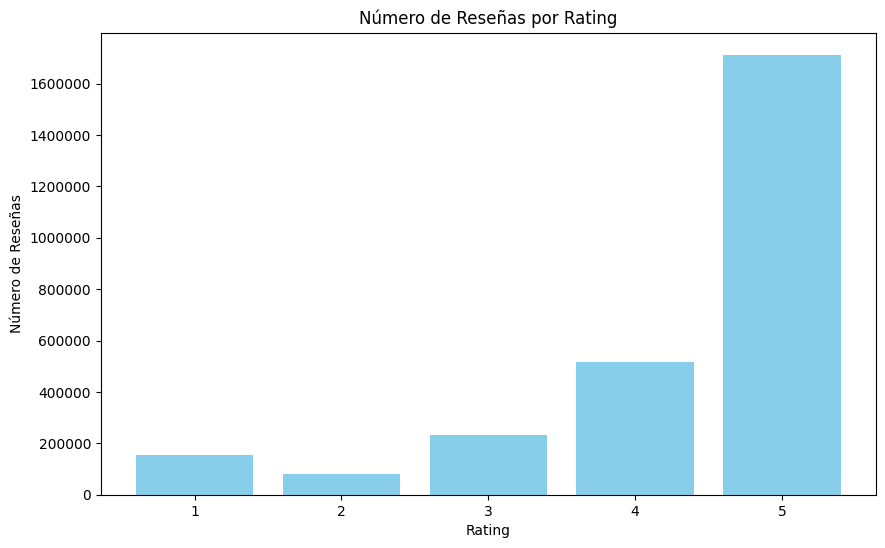

In [74]:
# Contar el número de reseñas para cada valor de rating
conteo_rating = df_clean['rating'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(conteo_rating.index, conteo_rating.values, color='skyblue')
plt.ticklabel_format(style='plain', axis='y')

# Agregar título y etiquetas de ejes
plt.title('Número de Reseñas por Rating')
plt.xlabel('Rating')
plt.ylabel('Número de Reseñas')

# Mostrar el gráfico
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\2702040069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean['time_normalizado'].dt.year, palette='pastel')
C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\2702040069.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean['time_normalizado'].dt.month , palette='pastel')
C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\2702040069.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean['time_normalizado'].dt.dayofweek, palette='pastel')
C:\Users\alejo\AppD

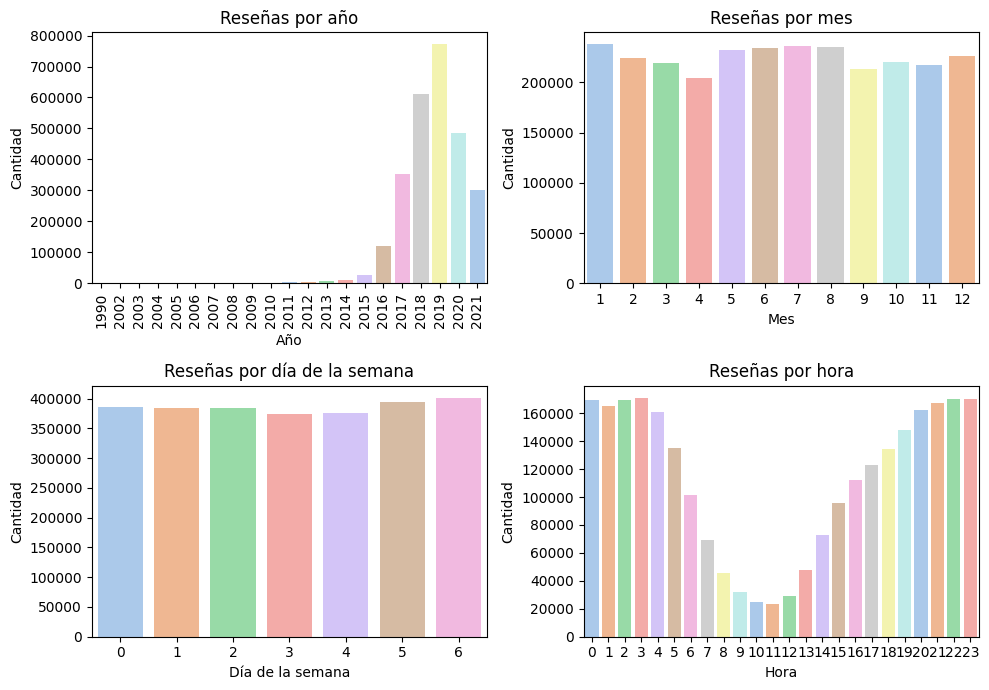

In [85]:
# SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS Comentarios

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 1)
sns.countplot(x=df_clean['time_normalizado'].dt.year, palette='pastel')
plt.title('Reseñas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

# Subplot 2: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 2)
sns.countplot(x=df_clean['time_normalizado'].dt.month , palette='pastel')
plt.title('Reseñas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para los días de la semana de la columna HORA
plt.subplot(2, 2, 3)
sns.countplot(x=df_clean['time_normalizado'].dt.dayofweek, palette='pastel')
plt.title('Reseñas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para las horas de la columna FECHA
plt.subplot(2, 2, 4)
sns.countplot(x=df_clean['time_normalizado'].dt.hour, palette='pastel')
plt.title('Reseñas por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Conclusiones 
### Reseñas por año : 
Podemos observar que el incremento en la cantidad de reseñas realizadas fue en constante crecimiento alcanzando su pico en 2019 y disminuyendo en 2020 y 2021 lo cual tiene sentido ya que son los años de la pandemia de COVID_19. Podemos notar una anomalia en el grafico lo cual nos indica un posible error en la fecha de los datos 
### Reseñas por mes :
No se nota ninguna diferencia notable en la cantidad de reseñas segun el mes.
### Reseñas por dia de la semana 
Lo mismo que en las reseñas por mes no hay una diferencia significativa  
### Reseñas por hora 
En este grafico si podemos destacar la considerable disminucion de la cantidad de reseñas desde las 6 am alcanzando su minimo a las 11 am luego volviendo a los valores de las 6 am a las 15pm . Entonces el periodo en horas del dia donde mas reseñas se realizan es desde las 15 pm hasta las 6 am 


### Rating promedio en los años y meses

C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\3012226102.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0], data=rating_promedio_por_año, x='año', y='rating', marker='o', palette=palette_pastel)
C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\3012226102.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[1], data=rating_promedio_por_mes, x='mes', y='rating', marker='o', palette=palette_pastel)


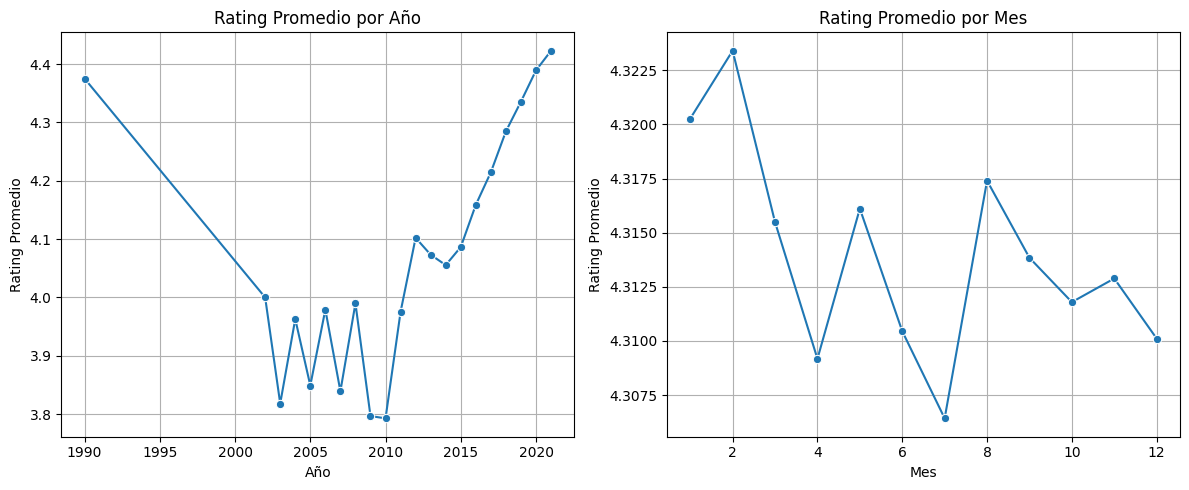

In [105]:
# Calcular el rating promedio por mes
rating_promedio_por_mes = df.groupby('mes')['rating'].mean().reset_index()

# Calcular el rating promedio por año
rating_promedio_por_año = df.groupby('año')['rating'].mean().reset_index()

# Definir una paleta de colores pastel
palette_pastel = sns.color_palette("pastel")

# Crear una figura y ejes para los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de dispersión para el rating promedio por año
sns.lineplot(ax=axes[0], data=rating_promedio_por_año, x='año', y='rating', marker='o', palette=palette_pastel)
axes[0].set_title('Rating Promedio por Año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Rating Promedio')
axes[0].grid(True)

# Gráfico de dispersión para el rating promedio por mes
sns.lineplot(ax=axes[1], data=rating_promedio_por_mes, x='mes', y='rating', marker='o', palette=palette_pastel)
axes[1].set_title('Rating Promedio por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Rating Promedio')
axes[1].grid(True)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

## Conclusiones 
### Rating Promedio por año. 
Vemos un aumento considerable en el rating promedio por año desde el 2015 en adelante. Lo cual puede ser por el nivel de uso de la aplicacion y el incremento en la cantidad de usuarios lo cual hace que aumente el promedio. Nuevamente vemos una anomalia marcando datos en fechas ilogicas.
## Rating promedio por mes.
Observamos que el mes con mayor promedio en las reseñas es el 2 (Febrero) y el peor el 7(Julio) pero aun asi ningun promedio baja de 4 




## Correccion de errores detectados 

In [90]:
# Contamos la cantidad de datos segun el año 
conteo_por_año = df['año'].value_counts().sort_index()
print(conteo_por_año)

año
1990         8
2002         5
2003        11
2004        27
2005        53
2006        48
2007        56
2008        99
2009       182
2010      2143
2011      3778
2012      4443
2013      7505
2014     10603
2015     26800
2016    121301
2017    352864
2018    610549
2019    771747
2020    486540
2021    301238
Name: count, dtype: int64


Google maps fue fundad en 2005 

In [92]:
#Eliminamos los años ilogicos 
# Extraer el año de la columna 'time_normalizado'
df_clean['año'] = df_clean['time_normalizado'].dt.year

# Definimo los años a eliminar
años_a_eliminar = [1990, 2002, 2003, 2004]  

# Filtrar las filas que no pertenecen a los años que deseas eliminar
df_clean_2= df_clean[~df_clean['año'].isin(años_a_eliminar)]

C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\3063065465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['año'] = df_clean['time_normalizado'].dt.year


In [93]:
#Vemos el tamaño del data frame 
df_clean_2.shape

(2699949, 10)

## Correccion de los graficos afectados por el error 

C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\3116520763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_clean_2['time_normalizado'].dt.year, palette='pastel')
C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\3116520763.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=axes[0], data=rating_promedio_por_año, x='año', y='rating', marker='o', palette=palette_pastel)


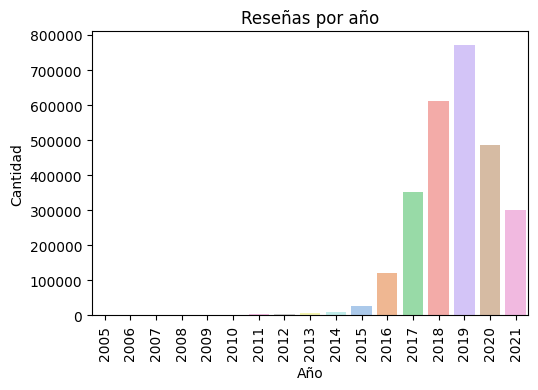

In [106]:
# Crear el gráfico
plt.figure(figsize=(10, 7))
#  Count plot para los años de la columna FECHA
plt.subplot(2, 2, 1)
sns.countplot(x=df_clean_2['time_normalizado'].dt.year, palette='pastel')
plt.title('Reseñas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_12244\1391660021.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=rating_promedio_por_año, x='año', y='rating', marker='o', palette=palette_pastel)


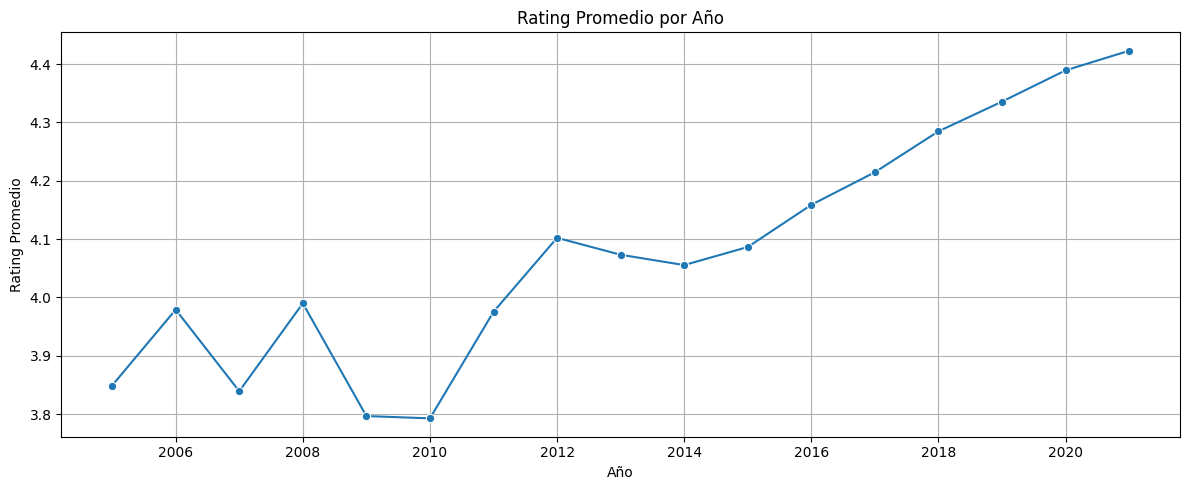

In [112]:
# Calcular el rating promedio por año
rating_promedio_por_año = df_clean_2.groupby('año')['rating'].mean().reset_index()

# Definir una paleta de colores pastel
palette_pastel = sns.color_palette("pastel")

# Crear una figura y ejes para los subgráficos
fig, axes = plt.subplots(figsize=(12, 5))

# Gráfico de dispersión para el rating promedio por año
sns.lineplot(data=rating_promedio_por_año, x='año', y='rating', marker='o', palette=palette_pastel)
axes.set_title('Rating Promedio por Año')
axes.set_xlabel('Año')
axes.set_ylabel('Rating Promedio')
axes.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()